# Install detectron2

In [ ]:
# Dependencies 

'''
!pip install pyyaml==5.1 --user
!pip install torchvision==0.10.0 --user

# Install Detectron

# Windows
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

# LINUX
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.9/index.html

# After installation, you need to "restart runtime"
exit(0)
'''

In [1]:
# check pytorch installation: 
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
assert torch.__version__.startswith("1.9")   # please manually install torch 1.9 if Colab changes its default version

1.9.0+cpu False


In [2]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import cv2
import numpy as np
from detectron2.engine import DefaultPredictor

from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [6]:
import matplotlib.pyplot as plt
def display_image(image, figsize=(15,20)):
    try:
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    except: 
        pass
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.imshow(image)

# Run a pre-trained detectron2 model

We first download an image from the COCO dataset:

we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [7]:
from table_extractor.detectron_config import cfg
predictor = DefaultPredictor(cfg)

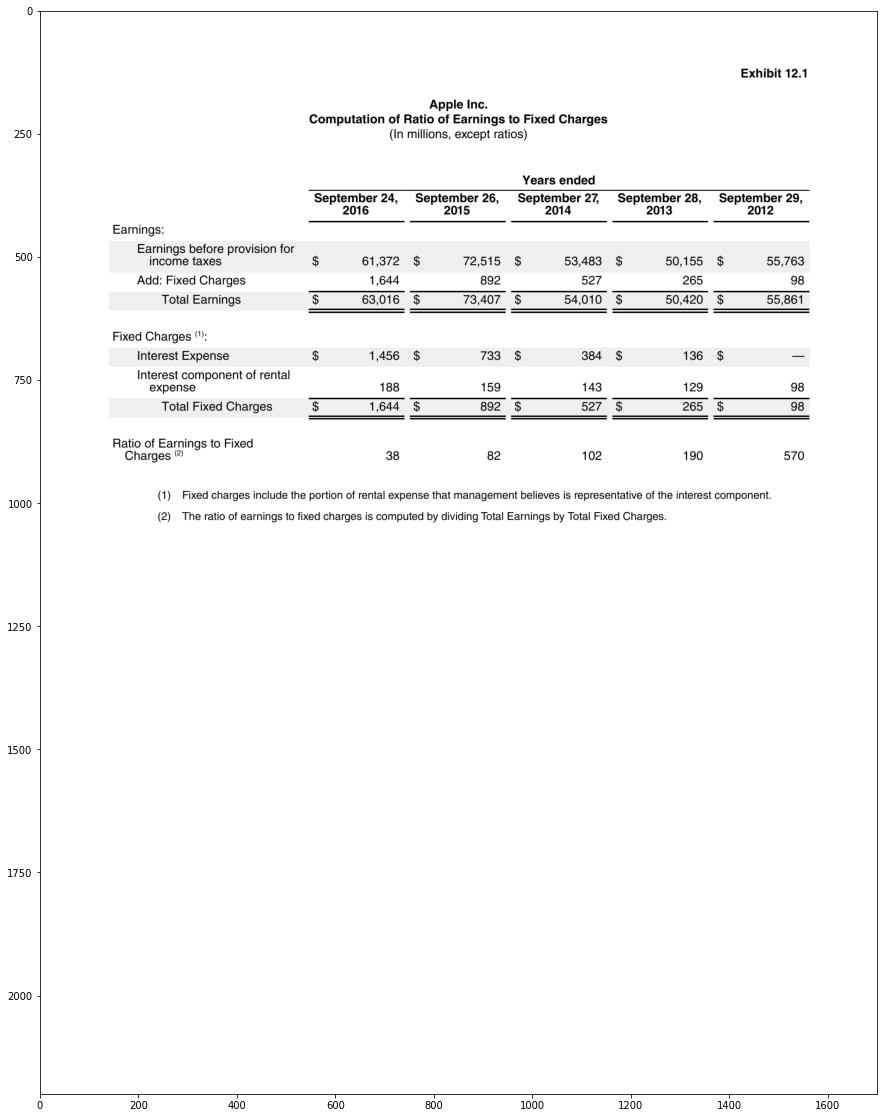

In [15]:
image = cv2.imread("Table Detection/data/Report_pics_apple/out_98.png")

display_image(image)

### Descriptive

In [63]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
image = cv2.imread("Table Detection/data/Report_pics_apple/out_98.png")
outputs = predictor(image)
print(outputs["instances"].pred_classes)
print(outputs["instances"].scores)
print(outputs["instances"].pred_boxes)

tensor([0])
tensor([0.9915])
Boxes(tensor([[ 127.3419,  302.0124, 1577.6124,  897.0557]]))


In [64]:
boxes = outputs["instances"].pred_boxes
len(boxes)

1

In [65]:
def myfunc():
    return {}
try:
    DatasetCatalog.register("Table", myfunc)
except:
    pass
MetadataCatalog.get("Table").set(thing_classes=["Table"])

metadata = MetadataCatalog.get('Table')

In [66]:
# We can use `Visualizer` to draw the predictions on the image.
# v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = Visualizer(image[:, :, ::-1], metadata=metadata, scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
# cv2_imshow(out.get_image()[:, :, ::-1])

In [67]:
image.shape

(2200, 1700, 3)

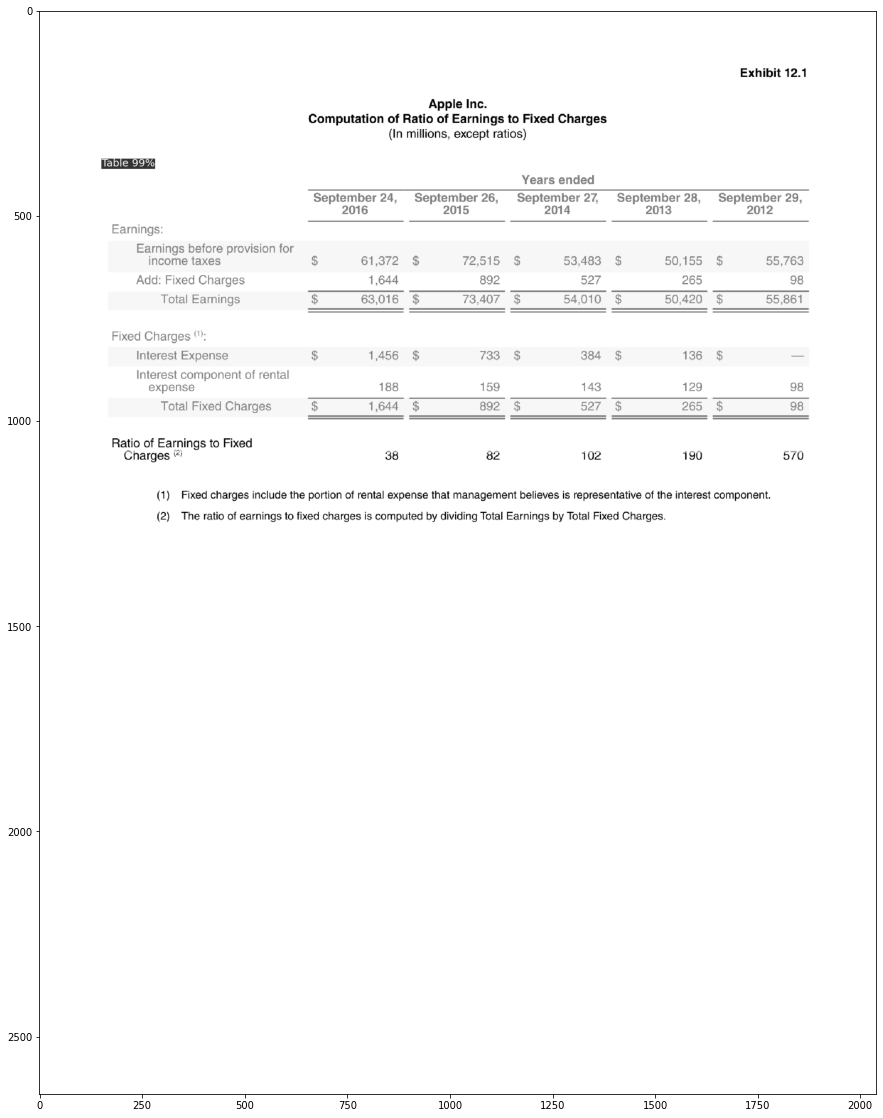

In [68]:
display_image(out.get_image()[:, :, ::-1], (15, 20))

20 . tensor([], dtype=torch.int64) tensor([])
21 . tensor([0]) tensor([0.9966])
22 . tensor([0]) tensor([0.9980])
23 . tensor([0, 0]) tensor([0.9968, 0.9924])
24 . tensor([0]) tensor([0.9929])
25 . tensor([], dtype=torch.int64) tensor([])
26 . tensor([0]) tensor([0.9993])
27 . tensor([0, 0, 0]) tensor([0.9981, 0.9979, 0.9972])
28 . tensor([0, 0, 0]) tensor([0.9969, 0.9962, 0.9945])
29 . tensor([0, 0, 0, 0]) tensor([0.9987, 0.9966, 0.9965, 0.9942])


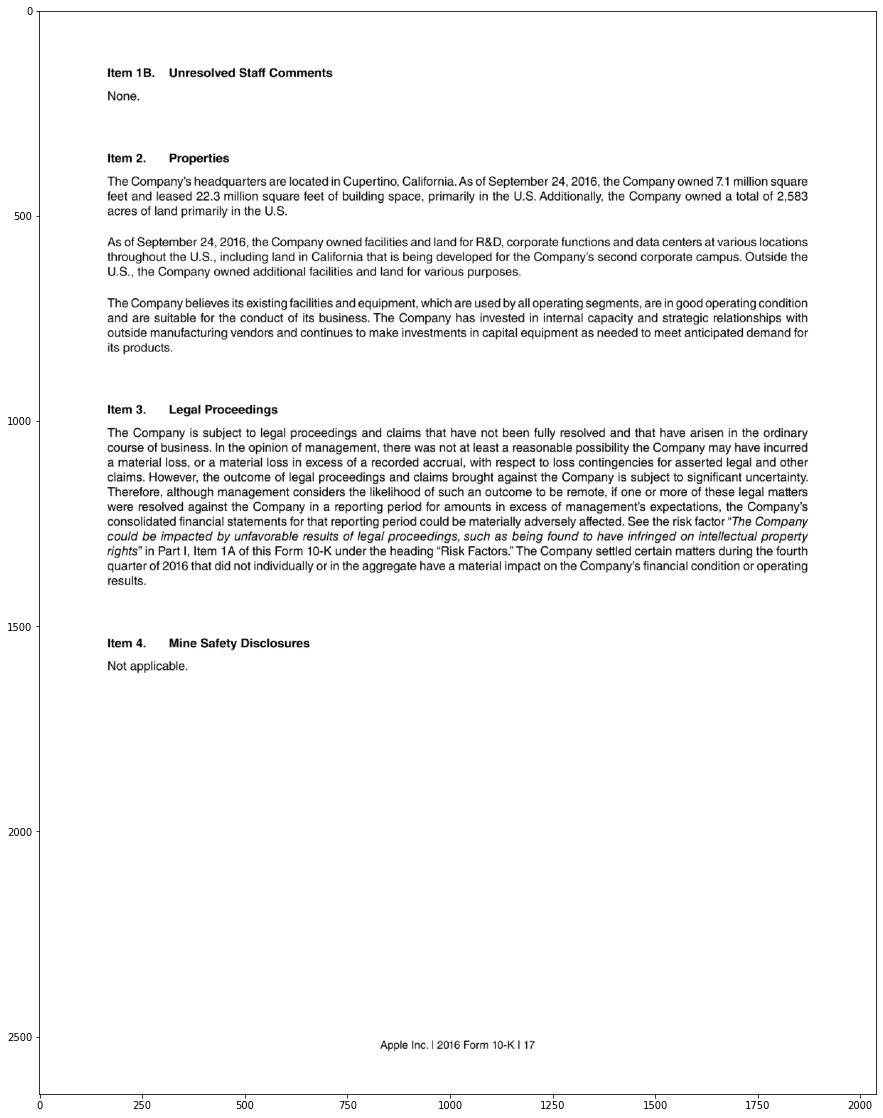

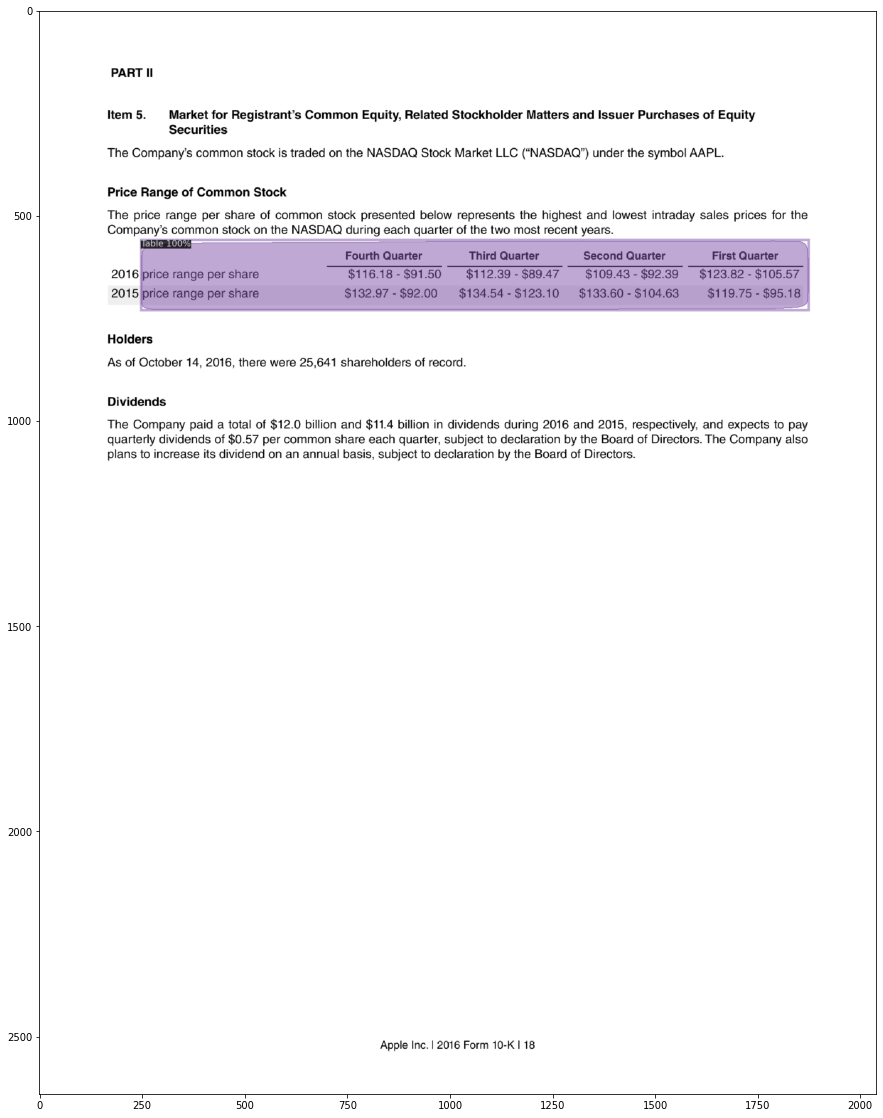

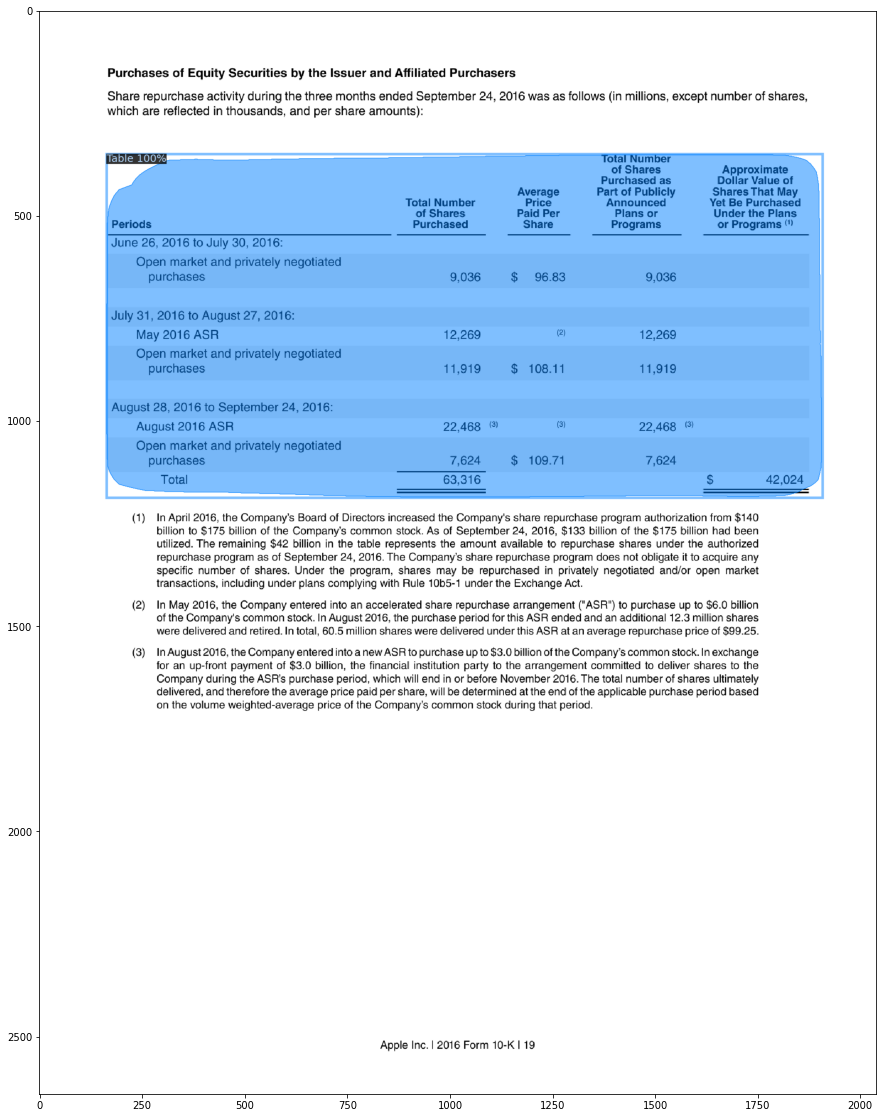

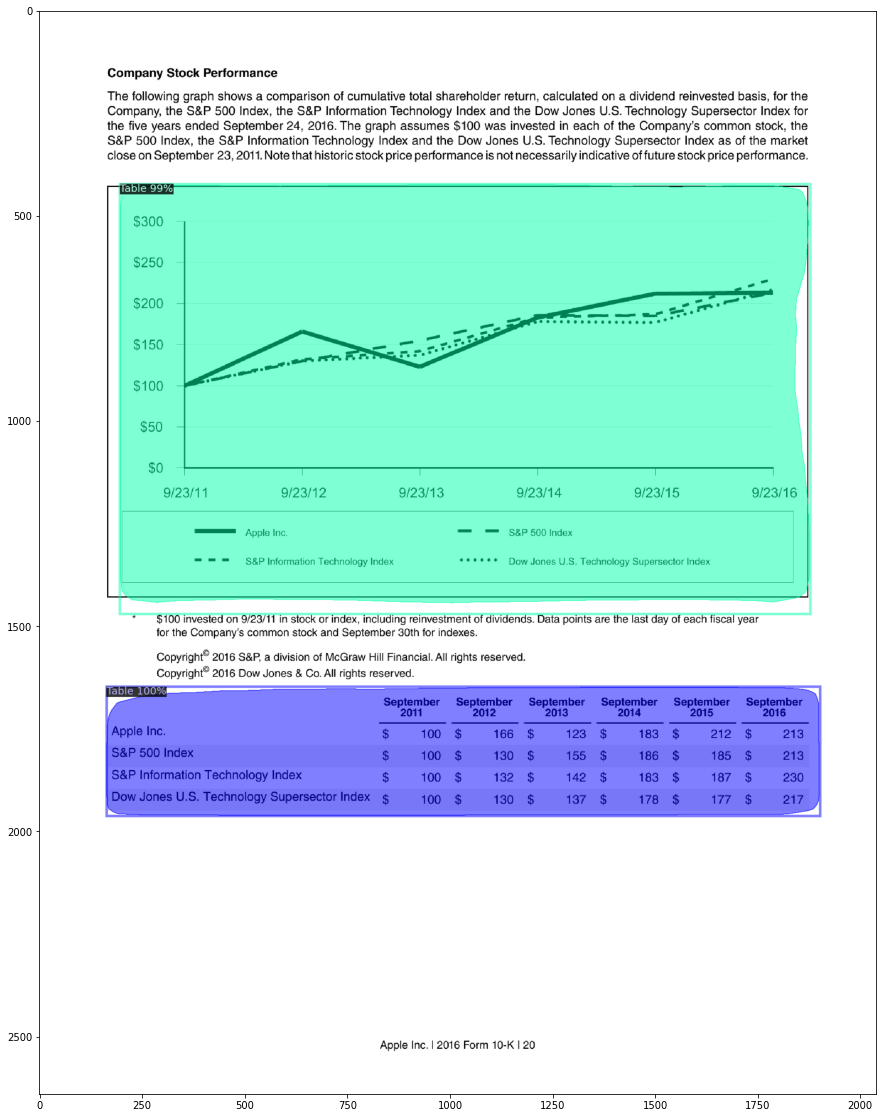

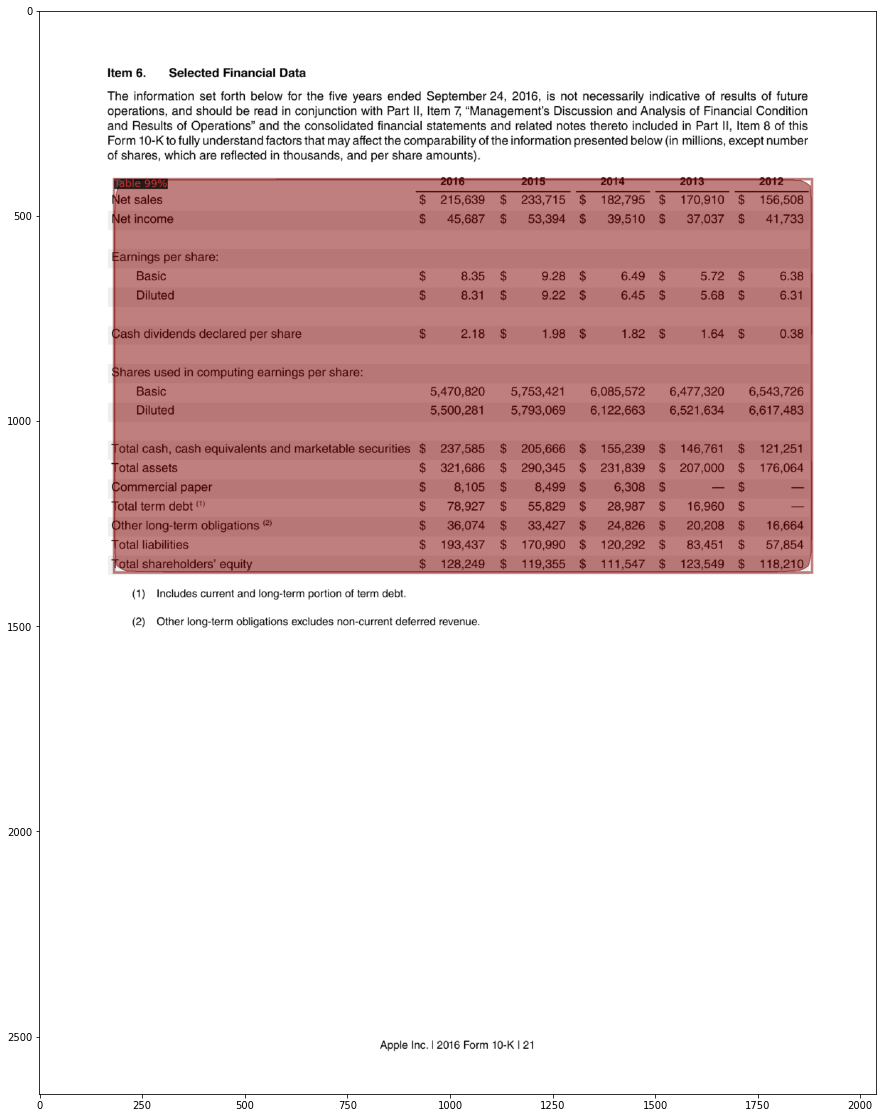

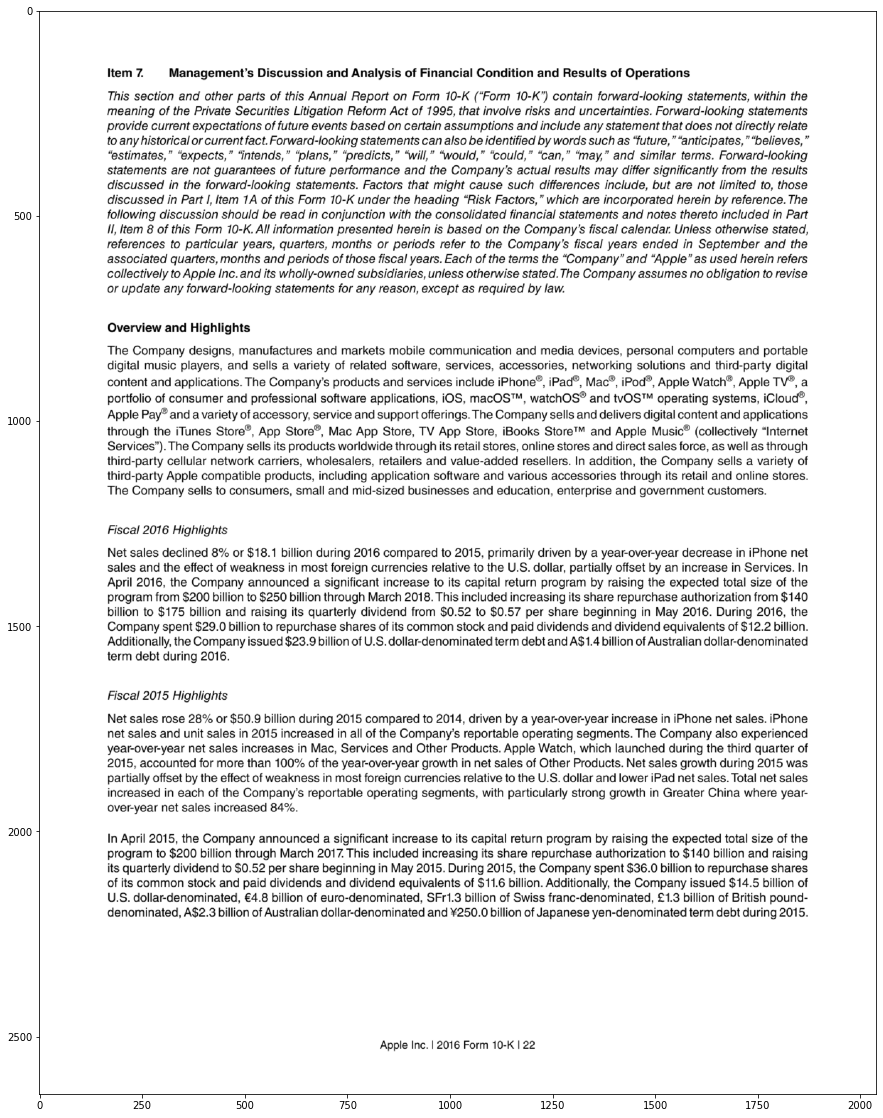

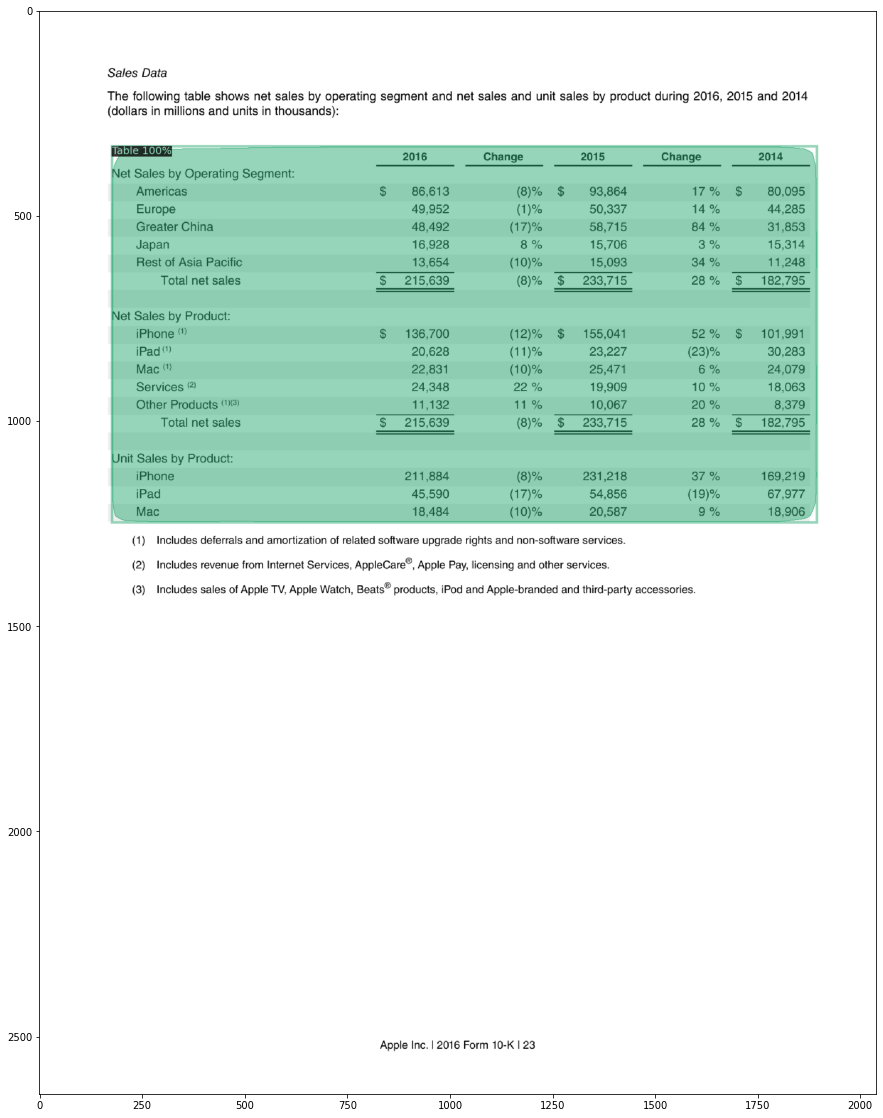

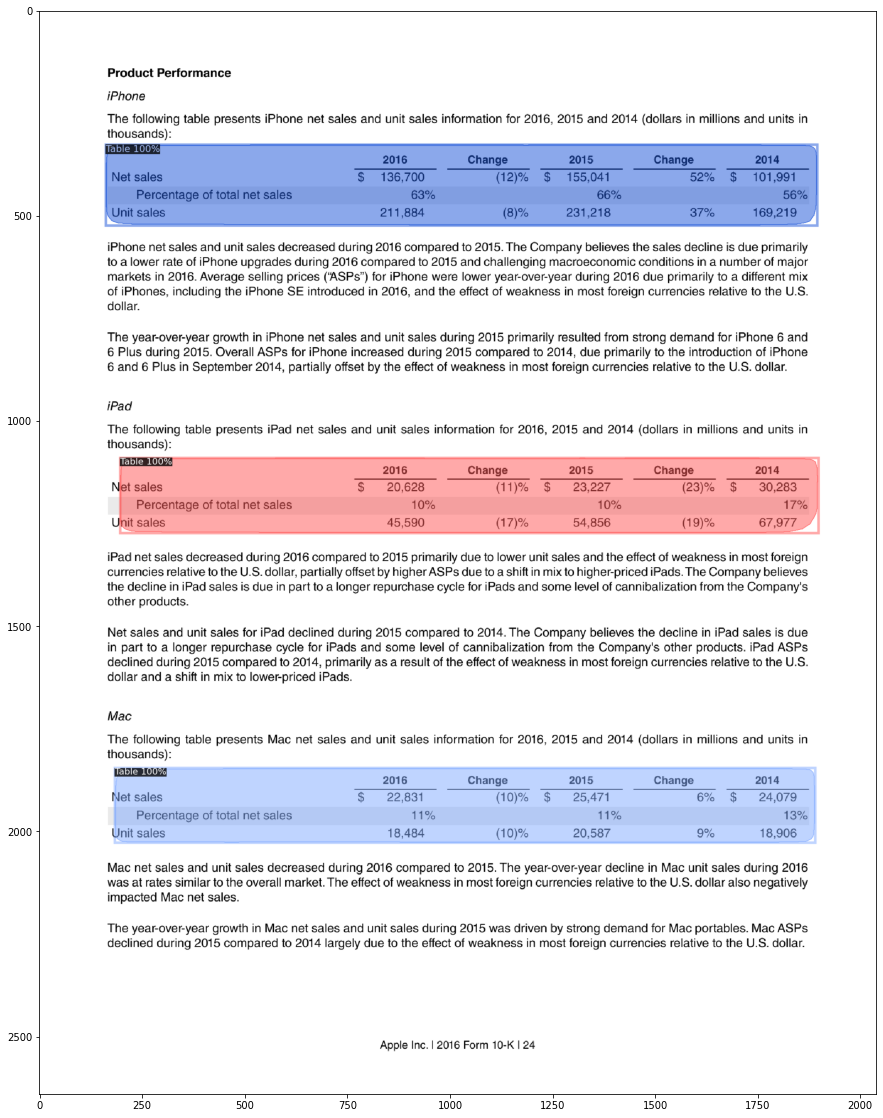

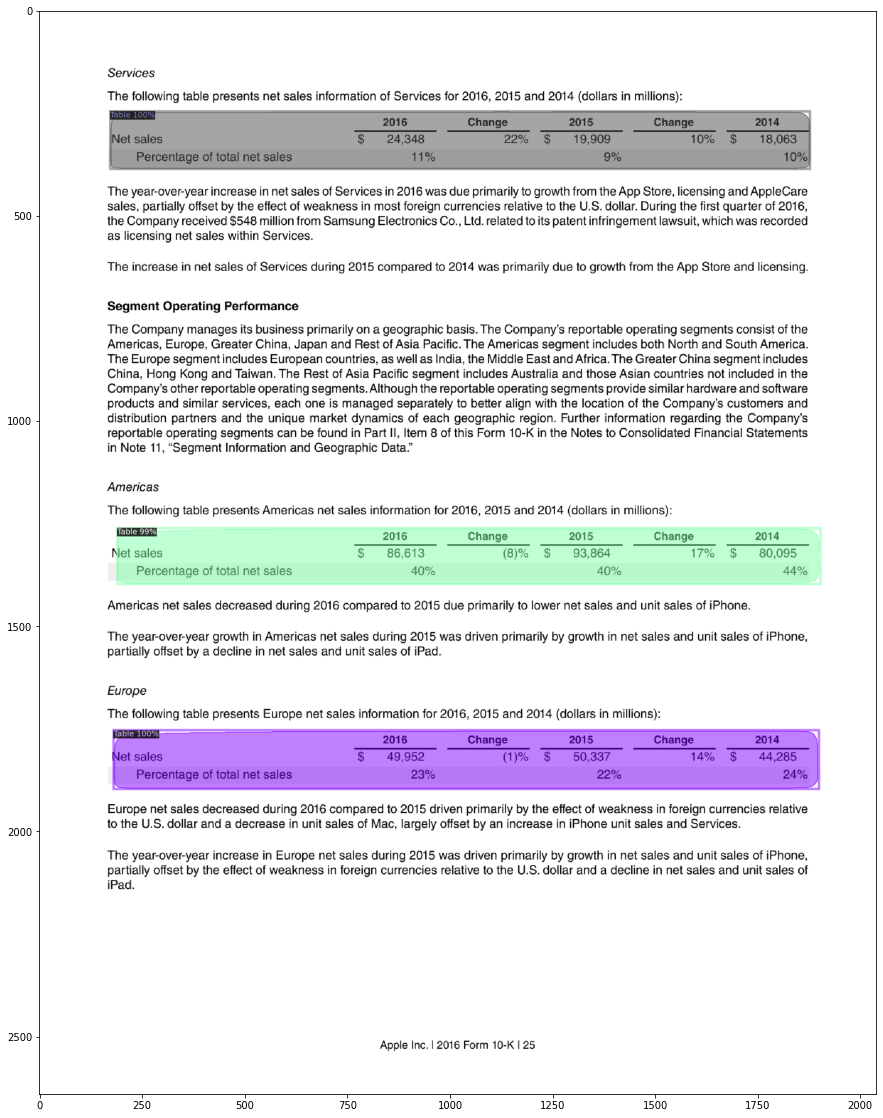

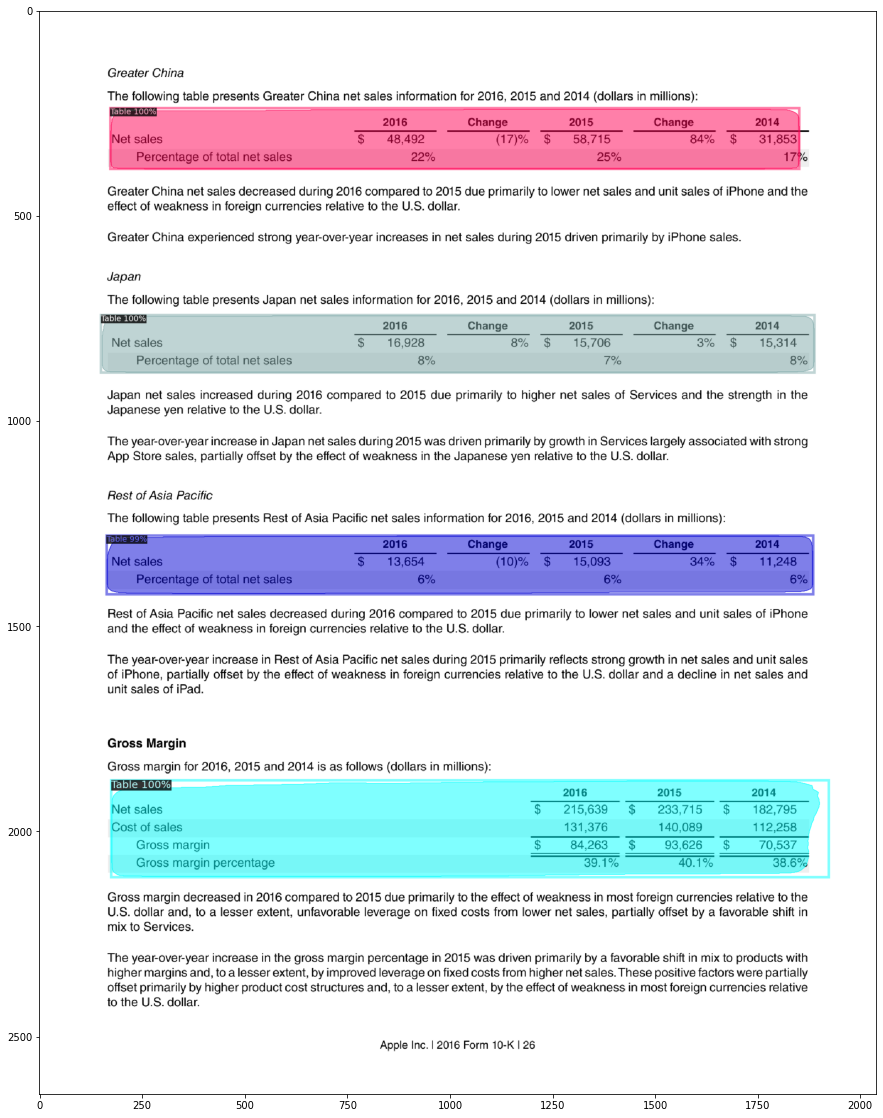

In [55]:
for i in range(20, 30):
    path = "Table Detection/data/Report_pics_apple/out_" + str(i) + '.png'
    image = cv2.imread(path)
    outputs = predictor(image)
    print(i, '.', outputs["instances"].pred_classes, outputs["instances"].scores)
    v = Visualizer(image[:, :, ::-1], metadata=metadata, scale=1.2)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    display_image(out.get_image()[:, :, ::-1], (15, 20))